In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

In [2]:
# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]

# plot clustering output on the two datasets
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2'):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

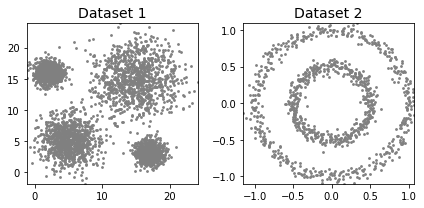

In [3]:
cluster_plots(dataset1, dataset2)

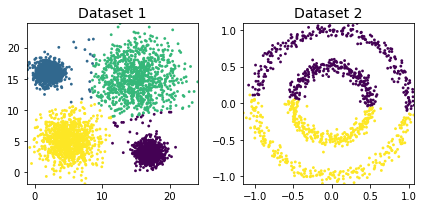

In [7]:
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=2, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset2)


cluster_plots(dataset1, dataset2, 
              kmeans_dataset1, kmeans_dataset2)

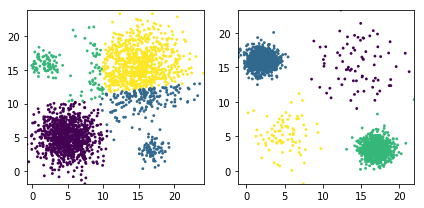

In [8]:
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[:2080,:],
                                                                                    dataset1[3000:3080,:]]))
kmeans_dataset2 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[-2080:,],
                                                                                    dataset1[:80,]]))
cluster_plots(np.vstack([dataset1[:2080,],dataset1[3000:3080,]]), 
              np.vstack([dataset1[-2080:,],dataset1[:80,]]), 
              kmeans_dataset1, kmeans_dataset2,title1='', title2='')

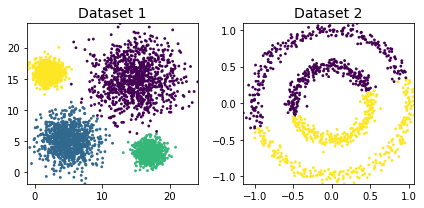

In [9]:
# implementing Expecation Maximistation (specifically Guassian Mixture Models)
em_dataset1 = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(dataset1)
em_dataset2 = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(dataset2)
cluster_plots(dataset1, dataset2, em_dataset1.predict(dataset1),  em_dataset2.predict(dataset2))

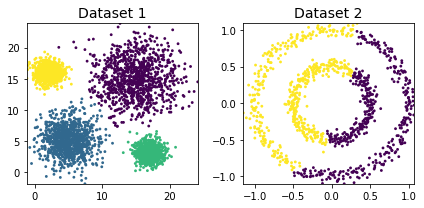

In [10]:
# implementing agglomerative (bottom up) hierarchical clustering
# we're going to specify that we want 4 and 2 clusters, respectively
hc_dataset1 = cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', 
                                              linkage='ward').fit_predict(dataset1)
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='average').fit_predict(dataset2)

cluster_plots(dataset1, dataset2, hc_dataset1, hc_dataset2)

/Users/denniswambua/.virtualenvs/ml/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


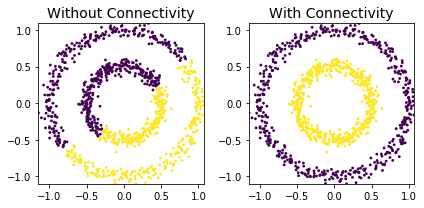

In [11]:
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete').fit_predict(dataset2)
connect = kneighbors_graph(dataset2, n_neighbors=5, include_self=False)
hc_dataset2_connectivity = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete',connectivity=connect).fit_predict(dataset2)
cluster_plots(dataset2, dataset2,hc_dataset2,hc_dataset2_connectivity,
             title1='Without Connectivity', title2='With Connectivity')

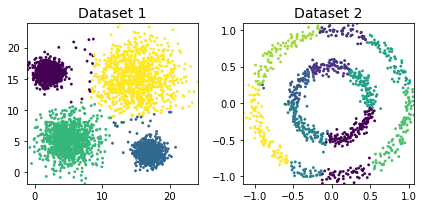

In [13]:
# implementing Mean Shift clustering in python
# auto-calculate bandwidths with estimate_bandwidth
bandwidths = [cluster.estimate_bandwidth(dataset, quantile=0.1) 
                         for dataset in [dataset1, dataset2]]
meanshifts = [cluster.MeanShift(bandwidth=band, bin_seeding=True).fit(dataset) 
              for dataset,band in zip([dataset1,dataset2],bandwidths)]
# print number of clusters for each dataset
# plot cluster output
cluster_plots(dataset1, dataset2, meanshifts[0].predict(dataset1), meanshifts[1].predict(dataset2))

Did not converge
Did not converge
Dataset1
('# Clusters:', 1501)
Dataset2
('# Clusters:', 147)


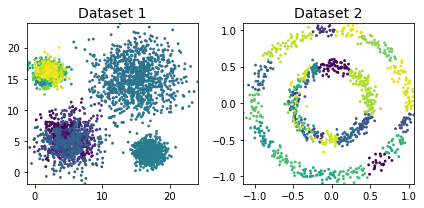

In [14]:
# implementing Affinity Propagation
ap_dataset1 = cluster.AffinityPropagation(verbose=True).fit_predict(dataset1)
ap_dataset2 = cluster.AffinityPropagation(verbose=True).fit_predict(dataset2)
print('Dataset1')
print("# Clusters:",max(ap_dataset1)+1)
print('Dataset2')
print("# Clusters:",max(ap_dataset2)+1)
cluster_plots(dataset1, dataset2, ap_dataset1, ap_dataset2)

Converged after 117 iterations.
Converged after 53 iterations.
Dataset1
('# Clusters:', 4)
Dataset2
('# Clusters:', 3)


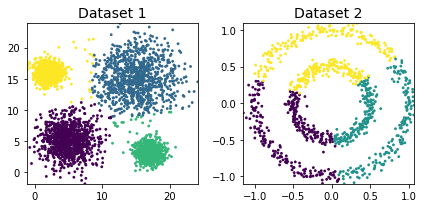

In [15]:
ap_dataset1 = cluster.AffinityPropagation(preference=-10000, damping=0.9, verbose=True).fit_predict(dataset1)
ap_dataset2 = cluster.AffinityPropagation(preference=-100, damping=0.8, verbose=True).fit_predict(dataset2)
print('Dataset1')
print("# Clusters:",max(ap_dataset1)+1)
print('Dataset2')
print("# Clusters:",max(ap_dataset2)+1)
cluster_plots(dataset1, dataset2, ap_dataset1, ap_dataset2)